In [1]:
# https://scikit-learn.org/stable/datasets/toy_dataset.html

# iris 꽃의 특징을 활용해서 품종을 분류하는 모델 만들기

# Import Module

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
import tensorflow as tf    #------------------------ 문제
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp 
import statsmodels.api as sm 

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

from keras.models import Model
from sklearn.linear_model import LogisticRegression #--------------- 모델 (회귀모형 x에 따라 y값이 바뀜)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
mm = MinMaxScaler()
rb = RobustScaler()
ss = StandardScaler()

# 데이터 가져오기

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

# 데이터 정보확인

In [4]:
# Iris 는 Dictionary 형태 { key : value }
# Dictionary 는 Index 가 없으므로 순서가 없다

## Dict - key값 

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## X : 문제

In [6]:
# Data = feature_names 임을 확인

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
print(len(iris['data']))
iris['data'][:3]

150


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

## Y : 답

In [9]:
# Target = Target_names 임을 확인

In [10]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## DESCR
* DataFrame에서는 사용불가

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## DataFrame 만들기

In [13]:
iris_df=pd.DataFrame(data=iris['data'],columns = iris['feature_names'])
iris_df.columns=['sl','sw','pl','pw'] # 컬럼명 간소화
iris_df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 컬럼추가_방법1
* df[col] = 리스트값

In [14]:
iris_df['target'] = iris['target']
iris_df.head(3)

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 컬럼추가_방법2
* concat (Series 만든 후 axis 기준으로 concat)

In [15]:
# 2번 방법 실행을 위한 Dataframe 재실행
iris_df=pd.DataFrame(data=iris['data'],columns = iris['feature_names'])
iris_df.columns=['sl','sw','pl','pw'] # 컬럼명 간소화
iris_df.head(3)

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [16]:
# 넣을 컬럼 series 만들기
a = pd.Series(iris['target'], name='target')
a[:3]

0    0
1    0
2    0
Name: target, dtype: int32

In [17]:
# Concat
iris_df = pd.concat([iris_df, a], axis=1)
iris_df.head(3)

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 결측치 확인
* 결측치 없고 전부 숫자형이면 EDA 시작 ♡

In [18]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [19]:
iris_df.isna().sum()

sl        0
sw        0
pl        0
pw        0
target    0
dtype: int64

### 결측치 처리

In [ ]:
# 결측치 0으로 채우기
# iris['sl'] = iris['sl'].fillna(0)
# iris['sl'].fillna(0, inplace=True)

# EDA (탐색적 데이터 분석)

## 정규분포 (Histogram)

<pre>
Histogram 은 도수분포를 막대도표로 시각화 한 것

[정규분포]
* 가장 예측이 잘되는 모델
* 95% 의 확률로 데이터가 범위 내 분포해있기때문에 분석하기 좋음
* 95% - 신뢰구간 
   5% - 유의구간 ( 각 2.5% )
* 아웃라이어의 영향을 많이 받음

[수치형]
* 이산형(나이)
* 연속형(키, 몸무게)  ===> 도수분포표 / 히스토그램

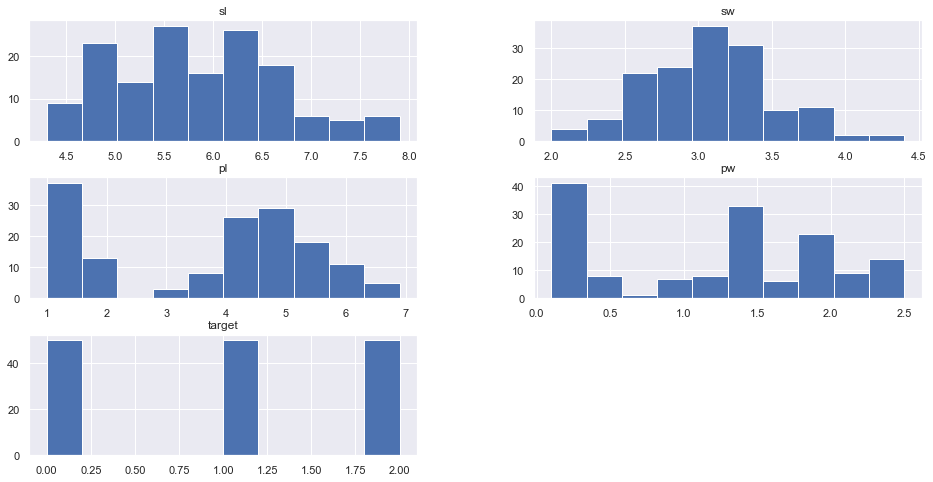

In [20]:
iris_df.hist(figsize=(16,8))
plt.show()

In [21]:
# 편차 확인 
# sl은 평균 5.84 기준으로 +-0.82 편차가 있다
iris_df.describe()

,sl,sw,pl,pw,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


* Seaborn distplot

Text(0.5, 1.0, 'pw')

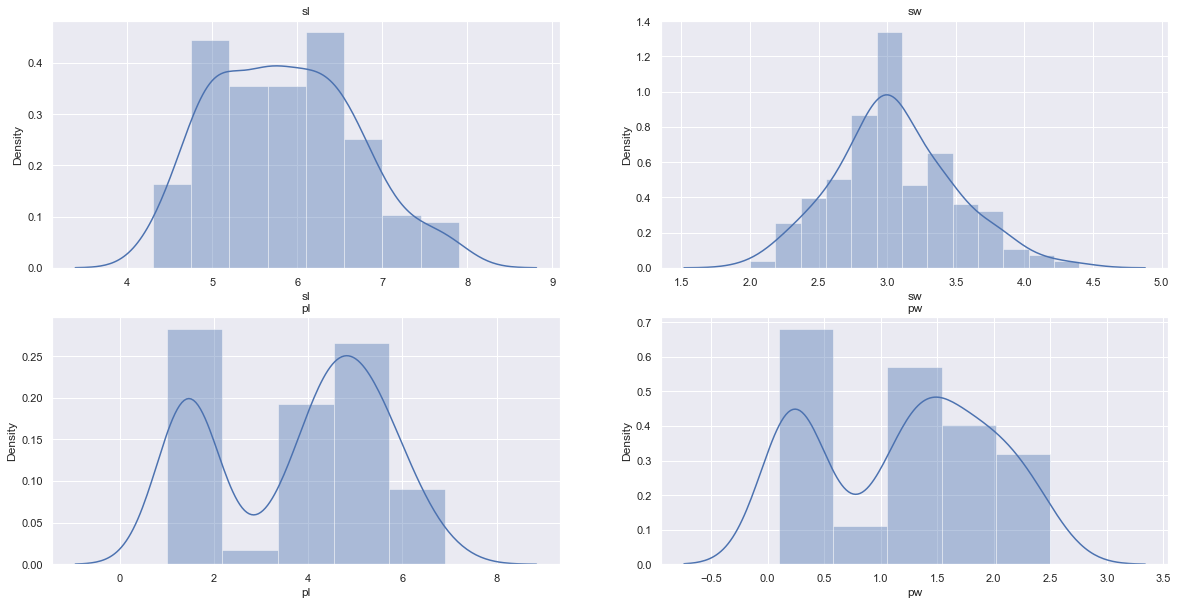

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.distplot(iris_df['sl'],  ax = axes[0,0])
sns.distplot(iris_df['sw'],  ax = axes[0,1])    # 정규분포 / 첨도가 크다
sns.distplot(iris_df['pl'],  ax = axes[1,0])
sns.distplot(iris_df['pw'],  ax = axes[1,1])

axes[0,0].set_title("sl")
axes[0,1].set_title("sw")
axes[1,0].set_title("pl")
axes[1,1].set_title("pw")

## 산점도 (Scatter matrix)

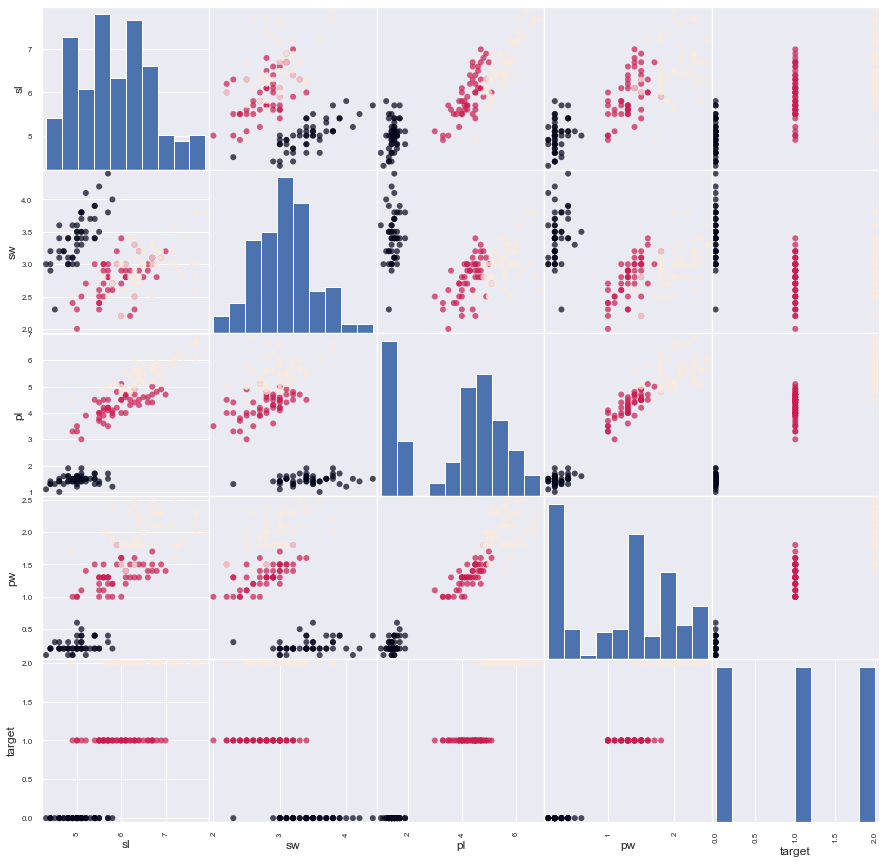

In [23]:
pd.plotting.scatter_matrix(iris_df,
                           figsize=(15,15),
                           marker = 'o' ,#마커 사이즈 
                           c = iris_df.target, #컬러를 종류(라벨)에 따라 나눔
                           alpha = 0.7 #투명도 (0 ~최대 1 )
                          )
plt.show()

## 상관분석 (Heatmap)

<pre>
[다중공선성]
독립변수끼리 상관관계가 높으면 회귀계수 추정에 오류를 범할 수 있다.

[다중공선성 해결방법]
- pw 와 pl 이 다중공선을 보인다.
1. pw 와 pl 중 다른관계와 더 많은 상관관계가 있는 걸 남긴다.
2. PCA(차원축소)한다 (행렬분해 > 고유값벡터찾기)
3. 피처가 적어 모델예측도가 떨어지면 그냥 진행

[상관관계]
target : pw > pl > sl > sw
pw     : pl > sl > sw
pl     : sl > sw 

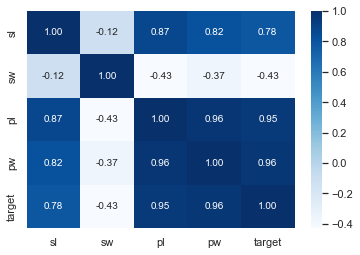

In [24]:
sns.heatmap(iris_df.corr(), annot=True,  fmt=".2f", cmap="Blues")
plt.show()

## 이상치 (Outlier)

### IQR

In [25]:
IQR = np.percentile(iris_df['sl'],75) - np.percentile(iris_df['sl'],25)
median = np.percentile(iris_df[iris_df['target']==2]['sl'],50)
minimum  =  np.percentile(iris_df[iris_df['target']==2]['sl'],25) - (1.5* IQR)
maximum =  np.percentile(iris_df[iris_df['target']==2]['sl'],75) +( 1.5* IQR)
print(IQR)
print(median)
print(minimum)
print(maximum)


################################33
iris_df[(iris_df['sl']< minimum) | (iris_df['sl']> maximum) ]   

################################33
iris_df[(iris_df['sl']< minimum) | (iris_df['sl']> maximum)  & (iris_df['target'] == 2)]

1.3000000000000007
6.5
4.274999999999999
8.850000000000001


,sl,sw,pl,pw,target


### boxplot

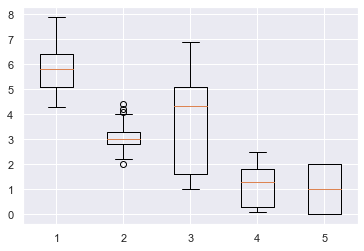

In [26]:
plt.boxplot(iris_df)
plt.show()  

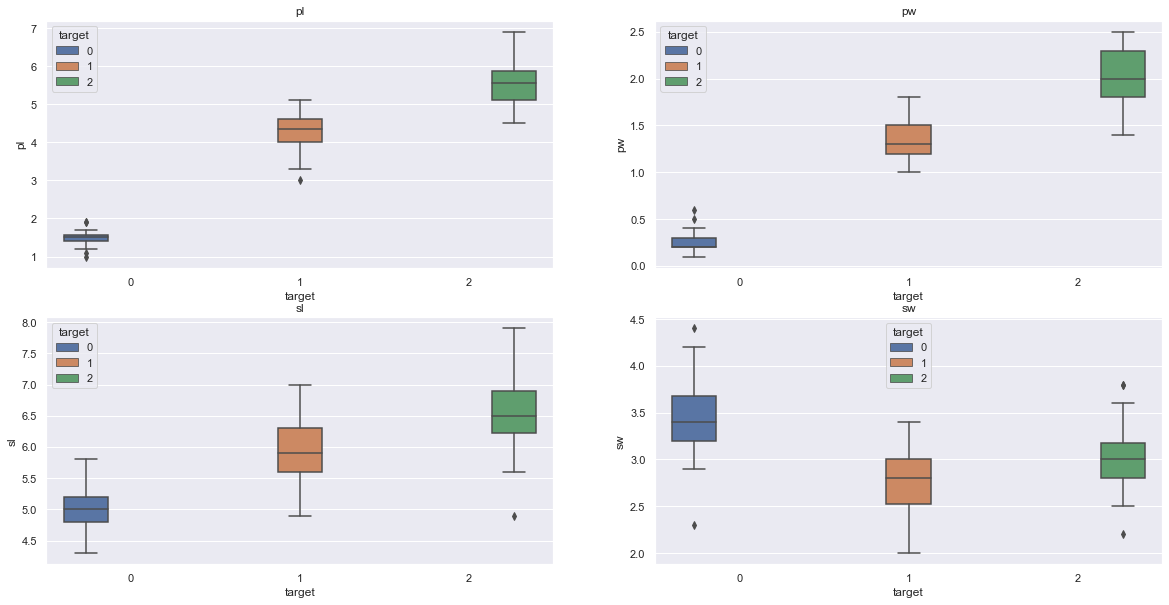

In [27]:
# Seaborn Boxplot
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.boxplot(x='target', y='pl',  data=iris_df, hue="target",  ax = axes[0,0])
sns.boxplot(x='target', y='pw',  data=iris_df, hue="target",  ax = axes[0,1])
sns.boxplot(x='target', y='sl',  data=iris_df, hue="target",  ax = axes[1,0])
sns.boxplot(x='target', y='sw',  data=iris_df, hue="target",  ax = axes[1,1])

axes[0,0].set_title("pl")
axes[0,1].set_title("pw")
axes[1,0].set_title("sl")
axes[1,1].set_title("sw")

plt.show()

In [28]:
iris_df.describe()

,sl,sw,pl,pw,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### outlier detect

2.4875 3.4 0.4750000000000001 4.3875


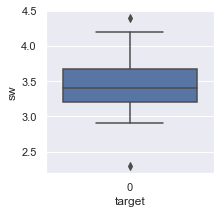

array([15, 41], dtype=int64)

In [29]:
fig = plt.figure(figsize=(3,3))
def outlier_detect(vtarget, col='sl' ):
    median  = np.percentile(iris_df[iris_df['target']==vtarget][col], 50)
    IQR     = np.percentile(iris_df[iris_df['target']==vtarget][col], 75) - np.percentile(iris_df[iris_df['target']==vtarget][col], 25)
    minimum = np.percentile(iris_df[iris_df['target']==vtarget][col], 25) - (1.5*IQR)
    maxmum  = np.percentile(iris_df[iris_df['target']==vtarget][col], 75) + (1.5*IQR)
    print(minimum, median, IQR, maxmum)
    sns.boxplot(x='target', y=col,  data=iris_df[iris_df['target']==vtarget])
    plt.show()
    return iris_df[ ((iris_df[col]<minimum) | (iris_df[col]>maxmum)) &  (iris_df['target']==vtarget)].index.values  


outlier_detect(vtarget=0, col='sw')


In [30]:
temp = iris_df.describe()
print(temp.loc['25%','sl'])
temp

5.1


,sl,sw,pl,pw,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### scatterplot

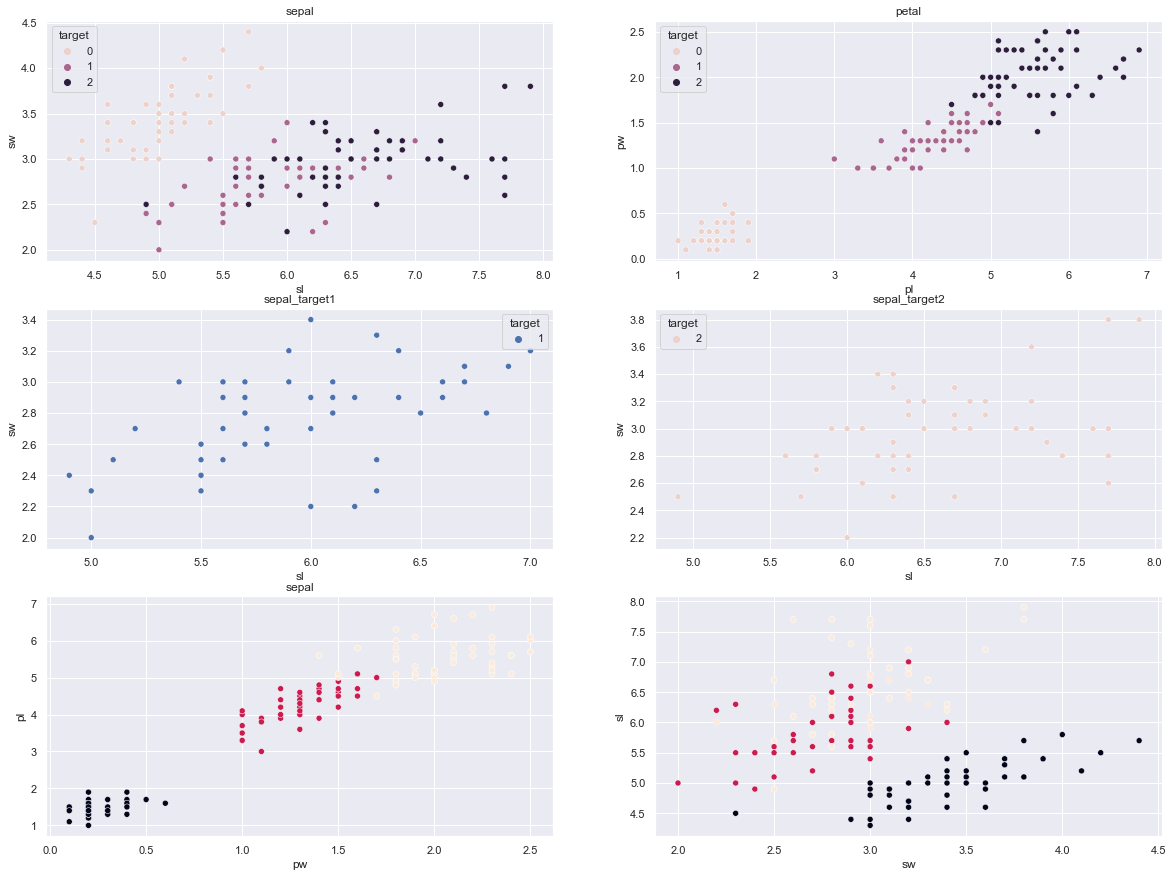

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))
sns.scatterplot(x = 'sl', y = 'sw', data=iris_df, hue="target",  ax = axes[0,0]) 
sns.scatterplot(x = 'pl', y = 'pw', data=iris_df, hue="target",  ax = axes[0,1])
sns.scatterplot(x = 'sl', y = 'sw', data=iris_df[iris_df['target']==1], hue="target",  ax = axes[1,0])
sns.scatterplot(x = 'sl', y = 'sw', data=iris_df[iris_df['target']==2], hue="target",  ax = axes[1,1])
sns.scatterplot(x = 'pw', y = 'pl', data=iris_df , c=iris_df['target'],  ax = axes[2,0])
sns.scatterplot(x = 'sw', y = 'sl' ,data=iris_df , c=iris_df['target'],  ax = axes[2,1])

axes[0,0].set_title("sepal")
axes[0,1].set_title("petal")
axes[1,0].set_title("sepal_target1")
axes[1,1].set_title("sepal_target2")
axes[2,0].set_title("petal") # ---------------------------기울기가 1에 가까운 차트
axes[2,0].set_title("sepal") # ---------------------------target 0,1 구분 어려움

plt.show()

# 모델학습

## train, test 분리

In [32]:
X = iris_df.iloc[: , :-1]
y = iris_df['target']
# X = iris_df.drop(['target'],  axis=1)
# y = iris_df['target']
print(X.shape, y.shape, type(X), type(y))

train_X,test_X,train_y,test_y= train_test_split(X, y, test_size=0.3,random_state=1111, shuffle=True) 
print(train_X.shape , test_X.shape,  train_y.shape,test_y.shape)

(150, 4) (150,) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(105, 4) (45, 4) (105,) (45,)


## 학습 & 예측

In [33]:
model = LogisticRegression()
model.fit(train_X, train_y)

computer_pred  = model.predict(test_X)
computer_pred_proba = model.predict_proba(test_X)

# print(test_X)
print(f"컴퓨터답안:{computer_pred}")
print(f"컴퓨터답안(P): {computer_pred_proba[:3]}")
print(f"실제test답안: {test_y.values}")

컴퓨터답안:[0 2 0 2 2 1 0 1 1 1 1 2 0 1 2 0 1 1 0 2 1 0 1 0 0 0 0 2 1 1 2 0 2 1 1 2 2
 1 0 1 2 1 1 2 0]
컴퓨터답안(P): [[9.72809999e-01 2.71898412e-02 1.59587685e-07]
 [2.31712972e-07 9.09879997e-03 9.90900968e-01]
 [9.65929480e-01 3.40703595e-02 1.60341773e-07]]
실제test답안: [0 2 0 1 2 1 0 1 1 1 1 2 0 1 2 0 1 1 0 2 1 0 1 0 0 0 0 2 1 1 2 0 2 1 1 2 2
 1 0 1 2 1 2 2 0]


## 평가

* ref : Metrics and scoring: quantifying the quality of predictions
* https://scikit-learn.org/stable/modules/model_evaluation.html

In [34]:
# 이진분류 : average = {‘binary’} , default=’binary’}</b></font>
# 멀티분류 : average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’}</b></font>
#--------------------------------------------------------------------------------------------------------------------
# y_true, y_score 파라미터 주의주의주의</b></font>
# average{‘micro’, ‘macro’, ‘samples’, ‘weighted’} or None, default=’macro’ --- Will be ignored when y_true is binary.
# multi_class{‘raise’, ‘ovr’, ‘ovo’}, default=’raise’</font>
#--------------------------------------------------------------------------------------------------------------------
acc       = accuracy_score  ( test_y, computer_pred)
f1        = f1_score        ( test_y, computer_pred,       average = 'macro')
recall    = recall_score    ( test_y, computer_pred,       average = 'macro')
precision = precision_score ( test_y, computer_pred,       average = 'macro')
roc_auc   = roc_auc_score   ( test_y, computer_pred_proba, average = 'macro', multi_class="ovr")
# classification = classification_report( test_y, computer_pred )
print(f"정확도:{acc:.4f}  \t f1:{f1:.4f} \t 재현률(recall):{recall:.4f} \t 정밀도(precision):{precision:.4f} \t roc:{roc_auc:.4f}    ")

정확도:0.9556  	 f1:0.9558 	 재현률(recall):0.9558 	 정밀도(precision):0.9558 	 roc:0.9955    


In [35]:
confusion_matrix(test_y, computer_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [36]:
print(np.array([1,2,3,4,5]).mean())
print(np.median([1,2,3,4,5]))
print(np.array([1,2,3,4,100]).mean())
print(np.median([1,2,3,4,100]))    # median 값은 안바뀜 (편차)

3.0
3.0
22.0
3.0


In [37]:
computer_proba = model.predict_proba(test_X)

roc_auc   = roc_auc_score   ( test_y, computer_proba, average = 'macro', multi_class="ovr")
# classification = classification_report( test_y, computer_pred )
print( f"roc:{roc_auc:.4f}    ")

roc:0.9955    


# 스케일링

* 데이터의 값이 너무 크거나 작아 변수의 영향이 제대로 반영되지 않을 경우, 알고리즘의 계산 과정에서 0으로 수렴하거나 값이 너무 커져버리는 경우 값의 수치를 변환해 사용
* StandardScaler() : 정규화 (평균0 편차1의 범위로 값의 수치를 변환)
* MinMaxScaler() : 최소0 최대1 범위로 데이터 값의 수치를 변환
* RobustScaler() : 중앙값 기준으로 데이터 값의 수치를 변환

## Standard Scaler
* [Z-score]
* 데이터를 통계적으로 표준정규분포화  (평균= 0, 표준편차= 1)

<img src="https://blog.kakaocdn.net/dn/bH267u/btqHem912RO/Zn8b42Him2KZtC0j01D7F0/img.gif" width=150>

In [42]:
ss = StandardScaler()

In [40]:
np.mean([0,1,1,0,2]), np.std([0,1,1,0,2])

(0.8, 0.7483314773547883)

In [41]:
vmean = np.mean([0,1,1,0,2])
vstd = np.std([0,1,1,0,2])
(2 - vmean) / vstd

1.6035674514745462

In [39]:
df = pd.DataFrame({"score": ["A","B","B","A","C"], "le_score":[0,1,1,0,2]})
df.head()

,score,le_score
0,A,0
1,B,1
2,B,1
3,A,0
4,C,2


In [48]:
print(df['le_score'])
print(df['le_score'].values.reshape(-1,1))   #------ -1은 1열 만큼 자동으로 행 생성의 의미

0    0
1    1
2    1
3    0
4    2
Name: le_score, dtype: int64
[[0]
 [1]
 [1]
 [0]
 [2]]


In [59]:
ss.fit(df['le_score'].values.reshape(-1,1))  #----1D X  ,  2D O  
ss_ref = ss.transform(df['le_score'].values.reshape(-1,1))
ss_ref

array([[-1.06904497],
       [ 0.26726124],
       [ 0.26726124],
       [-1.06904497],
       [ 1.60356745]])

In [60]:
df['ss_score'] = ss_ref
df.head()

,score,le_score,mm_score,ss_score
0,A,0,0.0,-1.069045
1,B,1,0.5,0.267261
2,B,1,0.5,0.267261
3,A,0,0.0,-1.069045
4,C,2,1.0,1.603567


<AxesSubplot:xlabel='ss_score', ylabel='Density'>

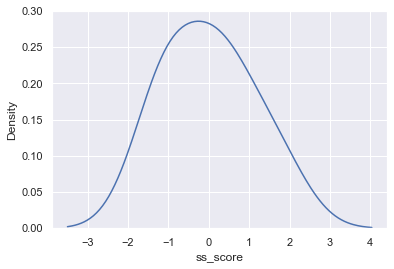

In [53]:
sns.distplot(df['ss_score'], hist=False)

## Min-Max Scaler
* 변수의 크기가 다 상대적이므로 값이 너무 작거나, 큰 경우 해당 변수가 Target에 미치는 영향력이 제대로 표현되지 않을 수 있음
* 값의 범위를 0이상 1이하로 변경

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbbwd6y%2FbtqHhFhqsm2%2FRVhEkC1KKzUViTGJWYMKlK%2Fimg.png" width=150>

In [61]:
vmin = np.min([0,1,1,0,2])
vmax = np.max([0,1,1,0,2])
(1-vmin) / (vmax - vmin)

0.5

In [62]:
mm = MinMaxScaler() 
mm.fit(df['le_score'].values.reshape(-1,1))
mm_res = mm.transform(df['le_score'].values.reshape(-1,1))
mm_res

array([[0. ],
       [0.5],
       [0.5],
       [0. ],
       [1. ]])

In [63]:
df['mm_score'] = mm_res
df.head()

,score,le_score,mm_score,ss_score
0,A,0,0.0,-1.069045
1,B,1,0.5,0.267261
2,B,1,0.5,0.267261
3,A,0,0.0,-1.069045
4,C,2,1.0,1.603567


## for 문 (Min-Max/Robust/Standard)

In [65]:
scaler_list = [ ("mm_scaler",MinMaxScaler()) , ("rb_scaler",RobustScaler()), ("ss_scaler",StandardScaler()) ]
for (nm, scaler) in scaler_list:
    #       scaler.fit      (df['le_score'].values.reshape(-1,1))
    # res = scaler.transform(df['le_score'].values.reshape(-1,1))
    res = scaler.fit_transform(df['le_score'].values.reshape(-1,1))  #---Train Test가 합쳐져서 스케일을 각각 안해도 되는 경우
    df[nm] = res
    # pd.concat([df, res], axis=1)
df.head()    

,score,le_score,mm_score,ss_score,mm_scaler,rb_scaler,ss_scaler
0,A,0,0.0,-1.069045,0.0,-1.0,-1.069045
1,B,1,0.5,0.267261,0.5,0.0,0.267261
2,B,1,0.5,0.267261,0.5,0.0,0.267261
3,A,0,0.0,-1.069045,0.0,-1.0,-1.069045
4,C,2,1.0,1.603567,1.0,1.0,1.603567


## 스케일링 주의사항

*  범주형(A,B,C --> 1,2,3 ) 데이터는 숫자로 되있는 값일지라도 스케일링 금지
* train 에서 fit(), transform() 하여 범위를 맞추고 모델을 생성한다
* test 에서는 사용한 범위를 그대로 이용하기 위해 fit()은 사용하지 않고 transform() 만 사용한다

In [67]:
X_train = list(range(0,11))
X_test= list(range(0,6))
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
X_train , X_test

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([[0],
        [1],
        [2],
        [3],
        [4],
        [5]]))

In [68]:
mm = MinMaxScaler()
mm.fit(X_train)
res = mm.transform(X_train)
res

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [69]:
res = mm.transform(X_test)
res

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5]])

* test에서 fit을 다시하는 경우 5가 1이되는 상황이 발생
* test는 train에서 사용한 fit()을 그대로 사용
* train 시 5는  0.5였다

In [71]:
# 안좋은 예시
mm.fit(X_test)
res = mm.transform(X_test)
res

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ]])